<a href="https://colab.research.google.com/github/s10bhavesh/ComputerVision/blob/main/Lab5_corner_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detect corners in an image using Harris corner detection, Shi-Tomasi Corner Detector and FAST algorithm 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

1 Harris Corner Detection

In [ ]:
def harris_corner(img):
  gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  gray_img = np.float32(gray_img)
 
  corners = cv.cornerHarris(gray_img, 5, 5, 0.04)
  img[corners>0.001*corners.max()] = [0,0,255]
 
  return img

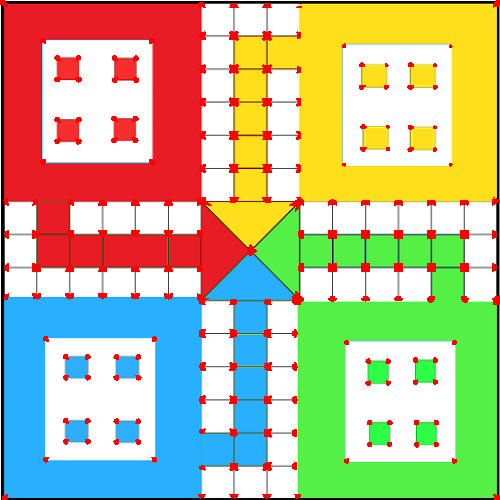

In [ ]:
img = cv.imread("/content/drive/My Drive/SEM2/Computer Vision/Lab/ludo.png")
img = cv.resize(img, (500,500))
converted_img = harris_corner(img)
cv2_imshow(img)
 


Shi-Tomasi Corner

In [ ]:
def shi_tomasi(image):
 
    #Converting to grayscale
    gray_img = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    
    #Specifying maximum number of corners as 1000
    # 0.01 is the minimum quality level below which the corners are rejected
    # 10 is the minimum euclidean distance between two corners
    corners_img = cv.goodFeaturesToTrack(gray_img,1000,0.01,10)
    
    corners_img = np.int0(corners_img)
 
    for corners in corners_img:
       
        x,y = corners.ravel()
        #Circling the corners in green
        cv.circle(image,(x,y),3,[0,255,0],-1)
 
    return image


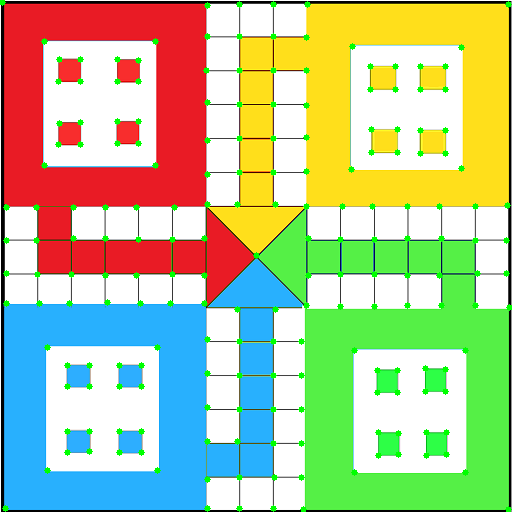

In [ ]:
img2 = cv.imread("/content/drive/My Drive/SEM2/Computer Vision/Lab/ludo.png")
converted_img = shi_tomasi(img2)
cv2_imshow(img2)

FAST

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
image1 = cv2.imread('/content/drive/My Drive/SEM2/Computer Vision/Lab/ludo.png')

# Convert  image to RGB
image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert image to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# # Display image and gray image
# fx, plots = plt.subplots(1, 2, figsize=(20,10))

# plots[0].set_title("Orignal Image")
# plots[0].imshow(image)

# plots[1].set_title("Gray Image")
# plots[1].imshow(gray, cmap="gray")



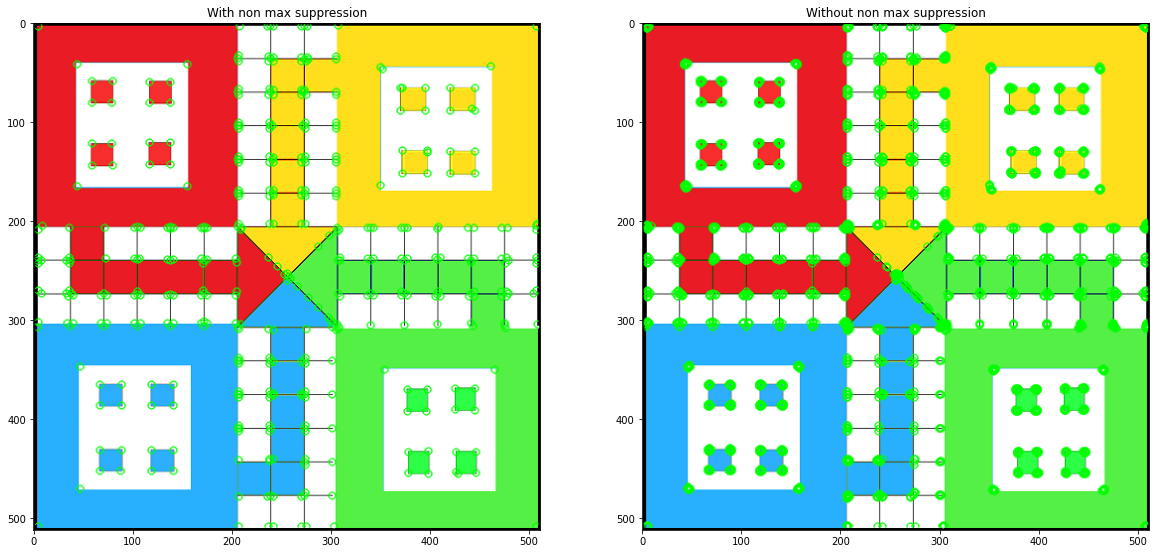

In [ ]:
fast = cv2.FastFeatureDetector_create() 

# Detect keypoints with non max suppression
keypoints_with_nonmax = fast.detect(gray, None)

# Disable nonmaxSuppression 
fast.setNonmaxSuppression(False)

# Detect keypoints without non max suppression
keypoints_without_nonmax = fast.detect(gray, None)

image_with_nonmax = np.copy(image)
image_without_nonmax = np.copy(image)

# Draw keypoints on top of the input image
cv2.drawKeypoints(image, keypoints_with_nonmax, image_with_nonmax, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(image, keypoints_without_nonmax, image_without_nonmax, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without non max suppression
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("With non max suppression")
plots[0].imshow(image_with_nonmax)

plots[1].set_title("Without non max suppression")
plots[1].imshow(image_without_nonmax)